#DATASCI W261, Machine Learning at Scale
--------
####Assignement:  week \#10
####[Lei Yang](mailto:leiyang@berkeley.edu) | [Michael Kennedy](mailto:mkennedy@ischool.berkeley.edu) | [Natarajan Krishnaswami](mailto:natarajan@krishnaswami.org)
####Due: 2016-03-29, 8AM PST

### Start Spark

In [2]:
import os
import sys
spark_home = os.environ['SPARK_HOME'] = '/Users/leiyang/Downloads/spark-1.6.1-bin-hadoop2.6/'
if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.8.2.1-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.6.1
      /_/

Using Python version 2.7.9 (default, Dec 15 2014 10:37:34)
SparkContext available as sc, HiveContext available as sqlContext.


###HW 10.0: Short answer questions

**What is Apache Spark and how is it different to Apache Hadoop?**
- Apache Spark is a cluster computing framework, which provides an interface for programming entire clusters with implicit data parallelism and fault-tolerance. It's different from Hadoop in two aspects: 
 1. provides in-momery processing instead disk-only data flow
 2. utilizes a lazy evaluation scheme, dataflow is recorded as a linearage of RDD transformations, and the processing will be optimized by the framework when an action is called. In Spark, there is no substantial benefit to writing a single complex map instead of chaining together many simple operations. Thus, users are free to organize their program into smaller, more manageable operations. 


**Fill in the blanks:**
- Spark API consists of interfaces to develop applications based on it in Java, **scala, python, R **languages (list languages). 
- Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or **Hadoop Yarn**, or the **Spark standalone resource manager** in a distributed manner.

**What is an RDD and show a fun example of creating one and bringing the first element back to the driver program.**
- RDD is a read-only multiset of data items distributed over a cluster of machines, that is maintained in a fault-tolerant way. The process of any data analysis can be abstracted by multiple steps of RDD creation and/or transformation. 
- example of display the first line of a text document:

In [4]:
textRDD = sc.textFile('MIDS-MLS-HW-10.txt')
textRDD.first()

u'==========================================================================='

**What is lazy evaluation and give an intuitive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation.**
- lazy evaluation refers to the dataflow process, where the processing steps are recorded as linearage of RDD creations and  transformations, and no actual processing will happen until an action is called. 
- under this paradigm users are free to organize their program into smaller, more manageable operations. And runtime optimization will be provided by the framework, such that computation resource is utilized efficiently.


###HW 10.1: 
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document as a the example document to run an experiment.  Report the following: provide a sorted list of tokens in decreasing order of frequency of occurence.



In [47]:
# create input RDD
inputRDD = sc.textFile('MIDS-MLS-HW-10.txt')
# simple takenize - no regex cleanup
tokenRDD = inputRDD.flatMap(lambda line: line.strip().split(' '))
# countByValue returns the count of each unique value in this RDD as a dictionary of (value, count) pairs. 
wordCount = tokenRDD.countByValue().items()
# create RDD based on dictionary collection
wordCountRDD = sc.parallelize(wordCount)
# keyfield based descending sort
wordCountRDD.sortBy(lambda p: p[1], ascending=False).collect()

[(u'', 56),
 (u'the', 44),
 (u'and', 23),
 (u'of', 17),
 (u'in', 17),
 (u'a', 11),
 (u'code', 9),
 (u'to', 9),
 (u'data', 8),
 (u'=', 8),
 (u'on', 7),
 (u'Using', 7),
 (u'is', 7),
 (u'for', 7),
 (u'with', 7),
 (u'KMeans', 6),
 (u'===', 6),
 (u'#', 6),
 (u'your', 6),
 (u'from', 5),
 (u'this', 5),
 (u'as', 5),
 (u'example', 4),
 (u'What', 4),
 (u'each', 4),
 (u'linear', 4),
 (u'Set', 4),
 (u'clusters', 4),
 (u'Sum', 4),
 (u'Comment', 4),
 (u'HW', 4),
 (u'==HW', 4),
 (u'Squared', 4),
 (u'results', 3),
 (u'+', 3),
 (u'100', 3),
 (u'plot', 3),
 (u'following', 3),
 (u'Spark', 3),
 (u'after', 3),
 (u'training', 3),
 (u'model', 3),
 (u'words', 3),
 (u'import', 3),
 (u'report', 3),
 (u'===HW', 3),
 (u'x', 3),
 (u'lazy', 3),
 (u'it', 3),
 (u'regression', 3),
 (u'document', 3),
 (u'Errors', 3),
 (u'using', 3),
 (u'Within', 3),
 (u'provided', 3),
 (u'count', 3),
 (u'an', 3),
 (u'Apache', 2),
 (u'--', 2),
 (u'list', 2),
 (u'vector', 2),
 (u'plots.', 2),
 (u'LASS0', 2),
 (u'here', 2),
 (u'findings.'

###HW 10.1.1
Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.



In [58]:
import re
# create input RDD
inputRDD = sc.textFile('MIDS-MLS-HW-10.txt')
# simple takenize
tokenRDD = inputRDD.flatMap(lambda line: line.strip().split(' '))
# apply filter to the RDD (transformation) - use regex to filter out words that begin with lower case letters
lowerRDD = tokenRDD.filter(lambda w: re.match('^[a-z]', w))
# countByValue returns the count of each unique value in this RDD as a dictionary of (value, count) pairs. 
wordCount = lowerRDD.countByValue().items()
# create RDD based on dictionary collection
wordCountRDD = sc.parallelize(wordCount)
# keyfield based descending sort
wordCountRDD.sortBy(lambda p: p[1], ascending=False).collect()

[(u'the', 44),
 (u'and', 23),
 (u'of', 17),
 (u'in', 17),
 (u'a', 11),
 (u'code', 9),
 (u'to', 9),
 (u'data', 8),
 (u'for', 7),
 (u'on', 7),
 (u'with', 7),
 (u'is', 7),
 (u'your', 6),
 (u'from', 5),
 (u'this', 5),
 (u'as', 5),
 (u'clusters', 4),
 (u'each', 4),
 (u'linear', 4),
 (u'example', 4),
 (u'results', 3),
 (u'using', 3),
 (u'count', 3),
 (u'words', 3),
 (u'report', 3),
 (u'import', 3),
 (u'lazy', 3),
 (u'training', 3),
 (u'plot', 3),
 (u'following', 3),
 (u'it', 3),
 (u'an', 3),
 (u'regression', 3),
 (u'document', 3),
 (u'provided', 3),
 (u'after', 3),
 (u'x', 3),
 (u'model', 3),
 (u'notebook:', 2),
 (u'list', 2),
 (u'iterations,', 2),
 (u'set', 2),
 (u'testing', 2),
 (u'up', 2),
 (u'run', 2),
 (u'regression.', 2),
 (u'vector', 2),
 (u'between', 2),
 (u'evaluation', 2),
 (u'available', 2),
 (u'be', 2),
 (u'https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0', 2),
 (u'found', 2),
 (u'here', 2),
 (u'or', 2),
 (u'findings.', 2),
 (u'one', 2),
 (u'iterations', 2),
 (u'tha

###HW 10.2: [KMeans](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.clustering.KMeans) a la MLLib 
Using the following  MLlib-centric KMeans code snippet: 

    from pyspark.mllib.clustering import KMeans, KMeansModel
    from numpy import array
    from math import sqrt

#### Load and parse the data
** NOTE**  kmeans_data.txt is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

    data = sc.textFile("kmeans_data.txt")
    parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

#### Build the model (cluster the data)
    clusters = KMeans.train(parsedData, 2, maxIterations=10, runs=10, initializationMode="random")

#### Evaluate clustering by computing Within Set Sum of Squared Errors
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))

    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error = " + str(WSSSE))

#### Save and load model
    clusters.save(sc, "myModelPath")
    sameModel = KMeansModel.load(sc, "myModelPath")

Run this code snippet and list the clusters that your find and compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.


In [5]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))
    
data = sc.textFile('kmeans_data.txt')
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))
clusters = KMeans.train(parsedData, k=2, maxIterations=10, initializationMode='random')

WSSSE = parsedData.map(lambda p: error(p)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

print '\nCluster centers: %s' %([str(x) for x in clusters.centers])

for p in parsedData.collect():
    print 'Point %s belongs to cluster %d' %(str(p), clusters.predict(p))

Within Set Sum of Squared Error = 0.692820323028

Cluster centers: ['[ 0.1  0.1  0.1]', '[ 9.1  9.1  9.1]']
Point [ 0.  0.  0.] belongs to cluster 0
Point [ 0.1  0.1  0.1] belongs to cluster 0
Point [ 0.2  0.2  0.2] belongs to cluster 0
Point [ 9.  9.  9.] belongs to cluster 1
Point [ 9.1  9.1  9.1] belongs to cluster 1
Point [ 9.2  9.2  9.2] belongs to cluster 1


###Comments:
- initialization is key to K-Mean training, where a good "guess" will save training time significantly
- random initialization is not usually a good strategy to start the training, especially for big dataset
- several alternatives, such as canopy, k-means++ and k-mean||, provide better centroid initialization

###HW 10.3: 
Download the following KMeans notebook:

https://www.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb?dl=0

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

- plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
- in each plot please report the Within Set Sum of Squared Errors for the found clusters. 
- comment on the progress of this measure as the KMeans algorithms runs for more iterations

###Data Generation

In [1]:
 %matplotlib inline
import numpy as np
import pylab 
import json
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

###Data Visualization

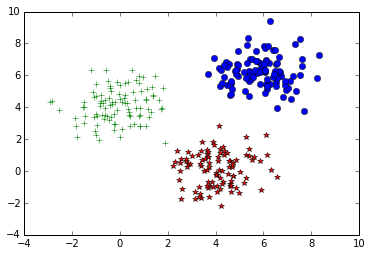

In [2]:
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

###Run MLlib K-Mean

In [6]:
import numpy as np

# plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

# calculate distance from the predicted centroid
def error(point, model):
    center = model.centers[model.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

# runner
def RunMLlibKMean(iteration):
    print '\n\nMLlib Kmean result with %d iterations: ' %iteration
    data = sc.textFile('data.csv')
    parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))
    clusters = KMeans.train(parsedData, k=3, runs=iteration, maxIterations=iteration, initializationMode='random')
    plot_iteration(clusters.centers)
    WSSSE = parsedData.map(lambda point: error(point, clusters)).reduce(lambda x, y: x + y)
    print("Within Set Sum of Squared Error = " + str(WSSSE))



MLlib Kmean result with 1 iterations: 


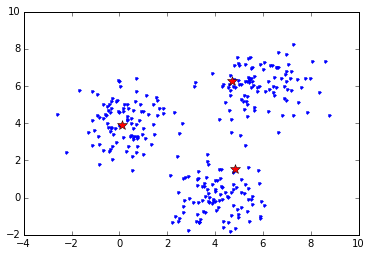

Within Set Sum of Squared Error = 494.593233976


MLlib Kmean result with 10 iterations: 


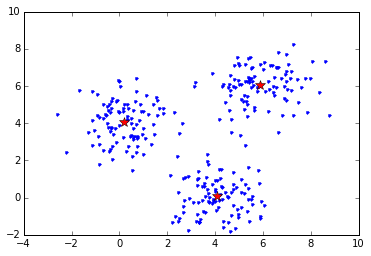

Within Set Sum of Squared Error = 386.271858789


MLlib Kmean result with 20 iterations: 


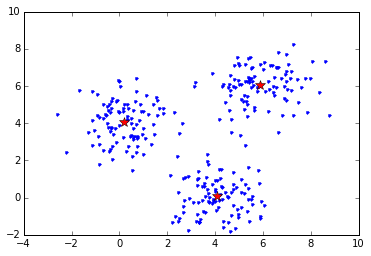

Within Set Sum of Squared Error = 386.271858789


MLlib Kmean result with 100 iterations: 


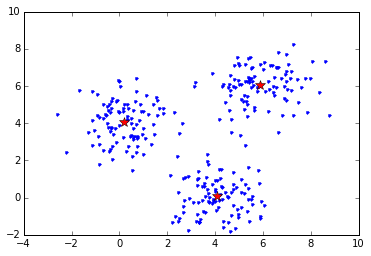

Within Set Sum of Squared Error = 386.271858789


In [151]:
RunMLlibKMean(1)
RunMLlibKMean(10)
RunMLlibKMean(20)
RunMLlibKMean(100)

###Comments:
- The training converged pretty quickly, after 10 iteration, the centroids are stablized with little change
- The *Within Set Sum of Squared Error (WSSSE)* can be considered as a loss function, for which the training is aiming to minimize. As training epoch increase, the centroids moves toward the center of each cluster and WSSSE will decrease to a minimum.

###HW 10.4: 
Using the KMeans code (homegrown code) provided repeat the experiments in HW10.3. Comment on any differences between the results in HW10.3 and HW10.4. Explain.



Iteration 1


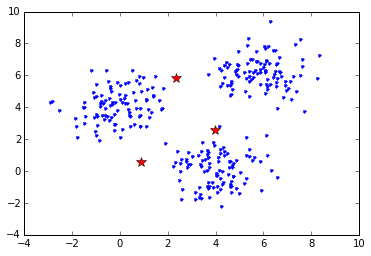

Within Set Sum of Squared Error = 868.586899114

Iteration 10


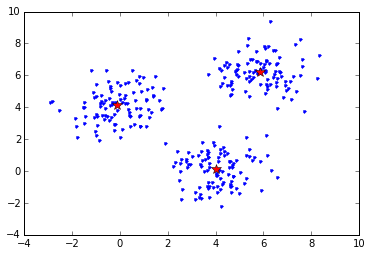

Within Set Sum of Squared Error = 382.24289193

Iteration 20


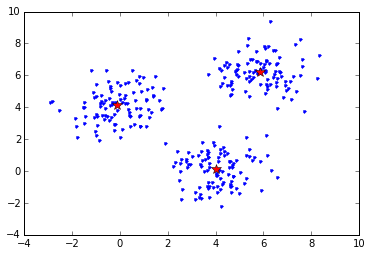

Within Set Sum of Squared Error = 382.24289193

Iteration 100


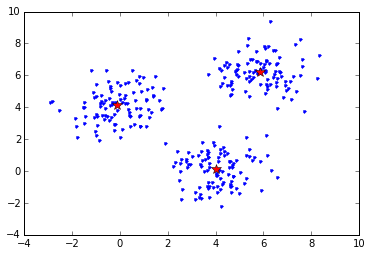

Within Set Sum of Squared Error = 382.24289193

Final Results:
[[-0.12003301  4.14959333]
 [ 4.03094543  0.13573238]
 [ 5.84786764  6.21901464]]


In [8]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(x):    
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

def toCenter(p):
    return np.sqrt(np.sum((p-centroids)**2, axis=1).min())

K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("data.csv").map(lambda line: np.array([float(x) for x in line.split(',')])).cache()
for i in range(100):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)  ), 
    #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
    #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
    # res[1][1][1] returns 1000 here
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    centroids = centroids_new
    if (i+1) in [1,10,20,100]:        
        print "\nIteration %d" %(i+1)
        #print centroids
        plot_iteration(centroids)
        WSSSE = D.map(toCenter).reduce(lambda x, y: x + y)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
print "\nFinal Results:"
print centroids

###Comments:
- We have similar performance and observation with MLlib code

###HW 10.5:  (OPTIONAL)
Using the KMeans code provided modify it to do a weighted KMeans and repeat the experiements in HW10.3. Comment on any differences between the results in HW10.3 and HW10.5. Explain.

NOTE: Weight each example as follows using the inverse vector length (Euclidean norm): 

$weight(X)= \frac{1}{\|X\|}$, 

where $\|X\| = \sqrt{X.X}= \sqrt{X_1^2 + X_2^2}$

Here $X$ is vector made up of $X_1$ and $X_2$.

###Weighted k-means [[Reference](https://www.researchgate.net/profile/Nittaya_Kerdprasop/publication/225127898_Weighted_K-Means_for_Density-Biased_Clustering/links/0c96053191e3985477000000.pdf)]
- weight each point when calculate the new centroid $c_i=\frac{\sum_i{w_ix_i}}{\sum_i{w_i}}$


Iteration 1


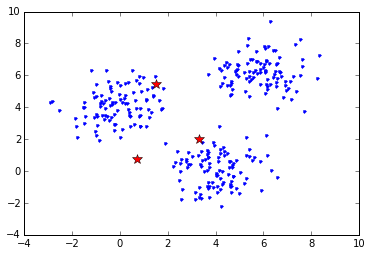

Within Set Sum of Squared Error = 875.376693873

Iteration 10


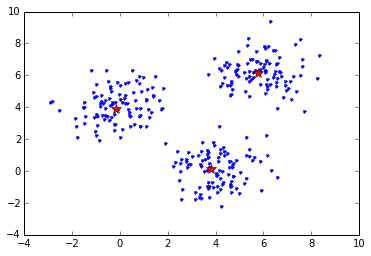

Within Set Sum of Squared Error = 385.956015964

Iteration 20


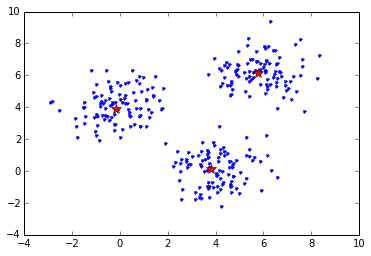

Within Set Sum of Squared Error = 385.956015964

Iteration 100


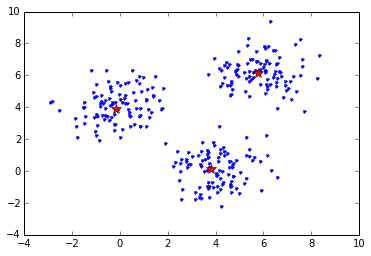

Within Set Sum of Squared Error = 385.956015964

Final Results:
[[-0.15486024  3.89924482]
 [ 3.8034431   0.13714737]
 [ 5.76411105  6.14670172]]


In [10]:
import numpy as np

#Calculate which class each data point belongs to
def nearest_centroid(x):    
    norm = np.sqrt(sum(x**2))
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    # weight centroid
    return (closest_centroid_idx,(x/norm,1/norm))

def toCenter(p):
    return np.sqrt(np.sum((p-centroids)**2, axis=1).min())

K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("data.csv").map(lambda line: np.array([float(x) for x in line.split(',')])).cache()
for i in range(200):  
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)  ), 
    #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
    #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
    # res[1][1][1] returns 1000 here
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    centroids = centroids_new
    if (i+1) in [1,10,20,100]:        
        print "\nIteration %d" %(i+1)     
        # print centroids
        plot_iteration(centroids)
        WSSSE = D.map(toCenter).reduce(lambda x, y: x + y)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
print "\nFinal Results:"
print centroids

###HW 10.6: Linear Regression (OPTIONAL)
###HW 10.6.1
Using the following linear regression notebook:

 https://www.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb?dl=0 

Generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set.

Using MLLib's LinearRegressionWithSGD train up a linear regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the linear regression model? Justify with plots and words. 

###Data Generation
- true model $y = 8x - 2$.

In [3]:
import numpy as np
import csv
def data_generate(fileName, w=[0,0], size=100, seed=0):
    np.random.seed(seed)
    x = np.random.uniform(-4, 4, size)
    noise = np.random.normal(0, 2, size)
    y = (x * w[0] + w[1] + noise)
    data = zip(y, x)
    with open(fileName,'wb') as f:
        writer = csv.writer(f)
        for row in data:
            writer.writerow(row)
    return True
# model wegiht
w = [8,-2]
# training data
data_generate('data_train.csv', w, 100, 0)
data_generate('data_test.csv', w, 100, 1)

True

###Data Visualization

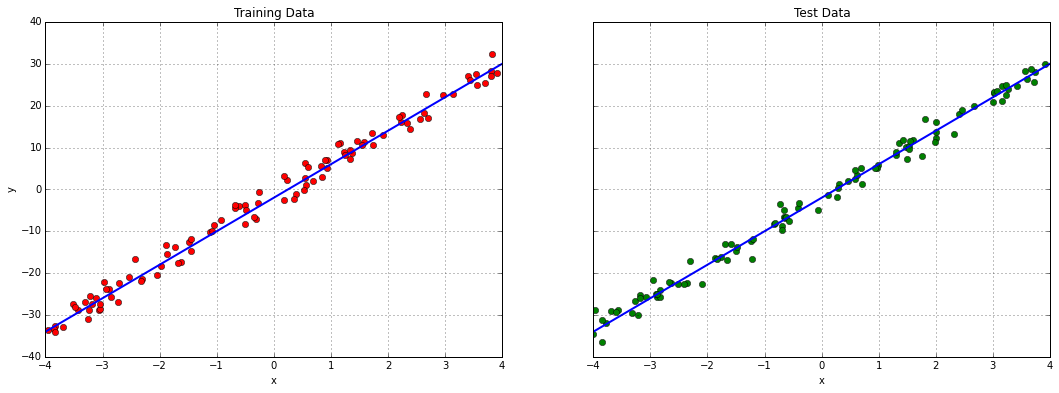

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

# true model
x = [-4, 4]
y = [(i * w[0] + w[1]) for i in x]
# load data
with open('data_train.csv', 'r') as f:
    dataTrain = [[float(p) for p in line.split(',')] for line in f.readlines()]
with open('data_test.csv', 'r') as f:
    dataTest = [[float(p) for p in line.split(',')] for line in f.readlines()]

# plot the data
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_size_inches([18,6])
ax1.plot([k[1] for k in dataTrain], [k[0] for k in dataTrain], 'ro')
ax1.plot(x, y, linewidth=2.0)
ax1.set_title('Training Data')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.grid()
ax2.plot([k[1] for k in dataTest], [k[0] for k in dataTest], 'go')
ax2.plot(x, y, linewidth=2.0)
ax2.set_title('Test Data')
ax2.set_xlabel('x')
ax2.grid()
plt.show()


###MLlib Linear Regression
http://spark.apache.org/docs/latest/mllib-linear-methods.html

In [4]:
# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[0], values[1:])


trainData = sc.textFile("data_train.csv").map(parsePoint)
testData = sc.textFile('data_test.csv').map(lambda l: [float(x) for x in l.split(',')])



In [ ]:
trainData

After 1 iterations: model - [43.420647014046118, -3.356525583044622], RMS - 83.8102
After 15 iterations: model - [16.768320436411848, -2.05546494112727], RMS - 20.9486
After 20 iterations: model - [7.972575790405104, -1.6181780801746715], RMS - 1.8058
After 30 iterations: model - [7.9839374840366926, -1.6187449131887346], RMS - 1.8075
After 40 iterations: model - [7.9839374840366926, -1.6187449131887346], RMS - 1.8075
After 50 iterations: model - [7.9839374840366926, -1.6187449131887346], RMS - 1.8075


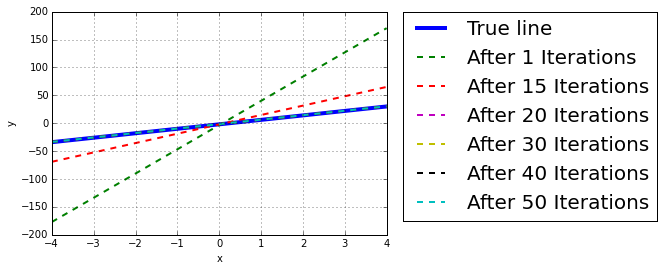

In [29]:
from pyspark.mllib.regression import LabeledPoint, LinearRegressionWithSGD, LinearRegressionModel
from math import sqrt

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[0], values[1:])


trainData = sc.textFile("data_train.csv").map(parsePoint)
testData = sc.textFile('data_test.csv').map(lambda l: [float(x) for x in l.split(',')])

# x-range
x = [-4, 4]
#w = truew
y = [(i * w[0] + w[1]) for i in x]
plt.plot(x, y, 'b', label="True line", linewidth=4.0)

# Build the model
iterations = [1, 15, 20, 30, 40, 50]
linestyle = ['g--', 'r--', 'm--', 'y--', 'k--', 'c--']
weight = inter = 0
for it, ls in zip(iterations, linestyle):
    model = LinearRegressionWithSGD.train(trainData, intercept=True, iterations=it)#, initialWeights=[weight])
    weight, inter = model.weights[0], model.intercept
    y = [i*weight+inter for i in x]
    # evaluate prediction RMS with test data
    rms = testData.map(lambda p: ((p[1]*weight+inter - p[0])**2, 1)).reduce(lambda a,b: (a[0]+b[0], a[1]+b[1]))
    print 'After %d iterations: model - %s, RMS - %.4f' %(it, str([weight, inter]), sqrt(rms[0]/rms[1]))
    plt.plot(x, y, ls, label="After %d Iterations" %it, linewidth=2.0)
#print model

# display the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

###Comments
- Stochastic gradient descent can have oscillating results at the first few (between 5 ~ 10) iterations, after that the result keeps improving.
- RMS has gone up a little after 20 iterations, indicate the model may be over fitted

###HW 10.6.2
- In the notebook provide, in the cell labeled "Gradient descent (regularization)", fill in the blanks and get this code to work for LASS0 and RIDGE linear regression.
- Using the data from 10.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.

####Ridge Regression
- Ridge regression shrinks the regression coefficients by imposing a penalty on their size. The ridge coefficients minimize a penalized residual sum of squares:
$$\hat{\beta}_{ridge}=\underset{\beta}{\operatorname{argmin}}\Big\{\frac{1}{2}\sum_{i=1}^N{(y_i-\beta_0-\sum_{j=1}^p{x_{ij}\beta_j})^2}+\lambda\sum_{j=1}^p{\beta_j^2}\Big\}$$

####LASS0 Regression
- The lasso estimate is defined by:
$$\hat{\beta}_{lasso}=\underset{\beta}{\operatorname{argmin}}\Big\{\frac{1}{2}\sum_{i=1}^N{(y_i-\beta_0-\sum_{j=1}^p{x_{ij}\beta_j})^2}+\lambda\sum_{j=1}^p{\mid\beta_j\mid}\Big\}$$



In [39]:
import numpy as np

def linearRegressionGDReg(data, wInitial=None, learningRate=0.05, iterations=50, regParam=0.01, regType=None):
    featureLen = len(data.take(1)[0])-1
    n = data.count()
    if wInitial is None:
        w = np.random.normal(size=featureLen) # w should be broadcasted if it is large
    else:
        w = wInitial
    for i in range(iterations):
        wBroadcast = sc.broadcast(w)
        gradient = data.map(lambda d: -2 * (d[0] - np.dot(wBroadcast.value, d[1:])) * np.array(d[1:])) \
                    .reduce(lambda a, b: a + b)
        if regType == "Ridge":            
            wReg = 2*(wBroadcast.value[:-1]+[0])
        elif regType == "Lasso":
            wReg = np.array([np.sign(x) for x in wBroadcast.value[:-1]]+[0])
        else:
            wReg = np.zeros(w.shape[0])
        gradient = gradient + regParam * wReg  #gradient:  GD of Sqaured Error+ GD of regularized term 
        w = w - learningRate * gradient / n
    return w

###Simulation

In [54]:
def ierationsPlot(fileName, truew, regT='Ridge', regP=0.01, learningR=0.05, iterStep=2):
    print 'Regulation type: %s, lambda: %.2f, learning rate: %.2f' %(regT, regP, learningR)
    x = [-4, 4]
    
    w = truew
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'b', label="True line", linewidth=4.0)
    
    data = sc.textFile(fileName).map(lambda line: [float(v) for v in line.split(',')]+[1.0]).cache()
    n = data.count()
    
    np.random.seed(400)
    w = np.random.normal(0,1,2)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'r--', label="After 0 Iterations", linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after 0 iterations: " + str(squared_error/n)
    
    
    w = linearRegressionGDReg(data, iterations=iterStep, regParam=regP, regType=regT, learningRate=learningR)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'g--', label="After %d Iterations" %iterStep, linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after %d iterations: %.4f" %(iterStep, squared_error/n)
    
    w = linearRegressionGDReg(data, wInitial=w, iterations=iterStep, regParam=regP, regType=regT, learningRate=learningR)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'm--', label="After %d Iterations" %(2*iterStep), linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after %d iterations: %.4f" %(2*iterStep, squared_error/n)
    
    w = linearRegressionGDReg(data, wInitial=w, iterations=iterStep, regParam=regP, regType=regT, learningRate=learningR)
    y = [(i * w[0] + w[1]) for i in x]
    plt.plot(x, y, 'y--', label="After %d Iterations" %(3*iterStep), linewidth=2.0)
    squared_error = data.map(lambda d: (d[0] - np.dot(w, d[1:]))**2).reduce(lambda a, b: a + b)
    print "Mean Squared Error after %d iterations: %.4f" %(3*iterStep, squared_error/n)
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=20, borderaxespad=0.)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid()
    plt.show()

Regulation type: Ridge, lambda: 0.01, learning rate: 0.05
Mean Squared Error after 0 iterations: 464.394955261
Mean Squared Error after 2 iterations: 24.2556
Mean Squared Error after 4 iterations: 6.4001
Mean Squared Error after 6 iterations: 5.0720


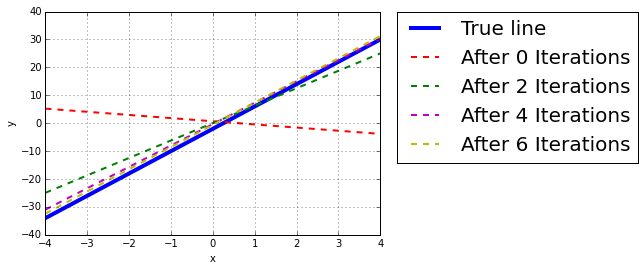

Regulation type: Lasso, lambda: 0.01, learning rate: 0.05
Mean Squared Error after 0 iterations: 464.394955261
Mean Squared Error after 2 iterations: 24.2550
Mean Squared Error after 4 iterations: 6.4001
Mean Squared Error after 6 iterations: 5.0725


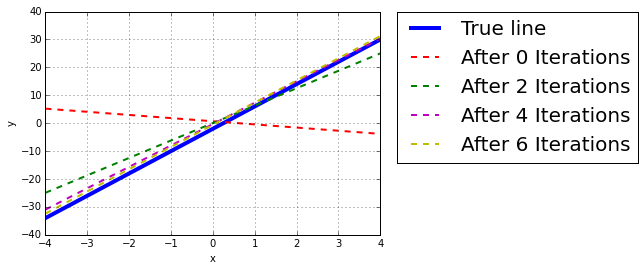

In [57]:
ierationsPlot('data_train.csv', [8, -2], regP=0.01, regT='Ridge', learningR=0.05, iterStep=2)
ierationsPlot('data_train.csv', [8, -2], regP=0.01, regT='Lasso', learningR=0.05, iterStep=2)

###stop yarn, hdfs, and job history

In [82]:
!/usr/local/Cellar/hadoop/2*/sbin/stop-yarn.sh
!/usr/local/Cellar/hadoop/2*/sbin/stop-dfs.sh
!/usr/local/Cellar/hadoop/2*/sbin/mr-jobhistory-daemon.sh --config /usr/local/Cellar/hadoop/2*/libexec/etc/hadoop/ stop historyserver 
sc.stop()

stopping yarn daemons
no resourcemanager to stop
localhost: no nodemanager to stop
no proxyserver to stop
Stopping namenodes on [localhost]
localhost: no namenode to stop
localhost: no datanode to stop
Stopping secondary namenodes [0.0.0.0]
0.0.0.0: no secondarynamenode to stop
no historyserver to stop


###start yarn, hdfs, and job history

In [3]:
!/usr/local/Cellar/hadoop/2*/sbin/start-yarn.sh
!/usr/local/Cellar/hadoop/2*/sbin/start-dfs.sh
!/usr/local/Cellar/hadoop/2*/sbin/mr-jobhistory-daemon.sh --config /usr/local/Cellar/hadoop/2*/libexec/etc/hadoop/ start historyserver 

starting yarn daemons
resourcemanager running as process 77362. Stop it first.
localhost: nodemanager running as process 77463. Stop it first.
Starting namenodes on [localhost]
localhost: namenode running as process 77612. Stop it first.
localhost: datanode running as process 77705. Stop it first.
Starting secondary namenodes [0.0.0.0]
0.0.0.0: secondarynamenode running as process 77824. Stop it first.
historyserver running as process 77932. Stop it first.


###stop spark

In [30]:
sc.stop()